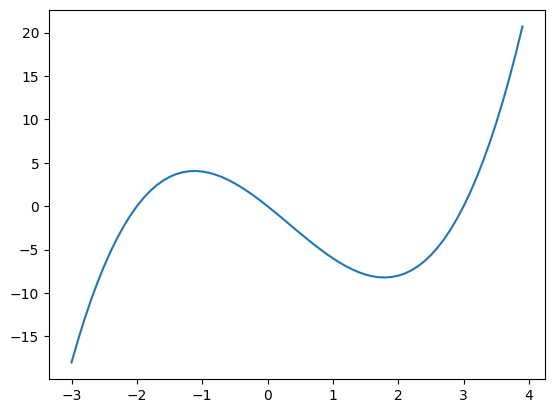

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

figure,axes=plt.subplots()
x=np.arange(-3,4,0.1)
y=x**3-x**2-x*6
axes.plot(x,y)
plt.show()
# df1=pd.DataFrame([x,plus_y]).transpose()